# Modeling the Difference Between Measures

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd

In [3]:
import statsmodels.formula.api as smf
import pandas as pd
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns

In [7]:
sns.set_context('paper')

In [8]:
sns.set_style('whitegrid')

In [9]:
df = gpd.read_parquet("../data/model_data.parquet")

<AxesSubplot:>

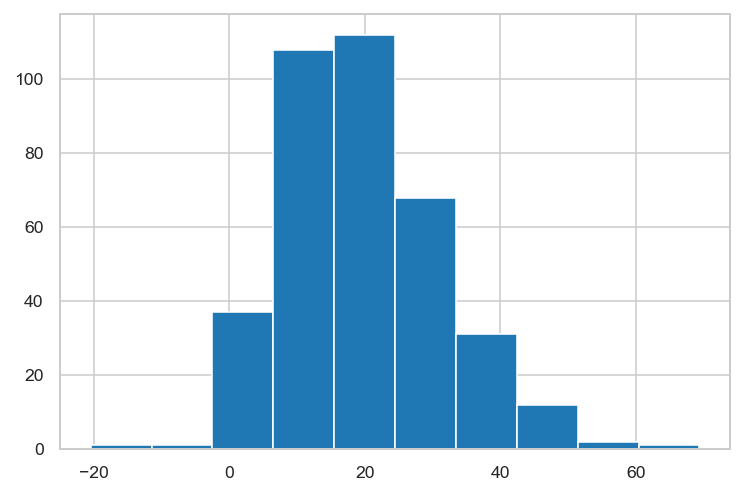

In [10]:
df.pct_diff.hist()

In [11]:
df.columns

Index(['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg',
       'streets_per_node_avg', 'intersection_count', 'street_length_total',
       'street_segment_count', 'street_length_avg', 'circuity_avg',
       'self_loop_proportion', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', 'node_props_dead_end',
       'node_props_3way', 'node_props_4way', 'name', 'planar_measure',
       'network_measure', 'seg_difference', 'p_value', 'ALAND', 'AWATER',
       'population', 'pop_density', 'geometry', 'cyclomatic', 'meshedness',
       'gamma', 'pct_diff', 'significant'],
      dtype='object')

In [12]:
features = [
    "k_avg",
    "streets_per_node_avg",
    "street_length_total",
    "street_segment_count",
    "street_length_avg",
    "street_density_km",
    "circuity_avg",
    "intersection_count",
    "intersection_density_km",
    "self_loop_proportion",
    "node_props_dead_end",
    "node_props_3way",
    "node_props_4way",
    "cyclomatic",
    "gamma",
    "meshedness",
    "ALAND",
    "AWATER",
    'population',
    'pop_density'
]

In [13]:
df[features].corr()

,k_avg,streets_per_node_avg,street_length_total,street_segment_count,street_length_avg,street_density_km,circuity_avg,intersection_count,intersection_density_km,self_loop_proportion,node_props_dead_end,node_props_3way,node_props_4way,cyclomatic,gamma,meshedness,ALAND,AWATER,population,pop_density
k_avg,1.000000,0.999800,0.174812,0.184314,-0.049380,-0.003012,-0.368338,0.185910,0.117747,-0.496090,-0.965407,-0.215885,0.907692,0.196907,1.000000,1.000000,0.193158,0.128444,0.159828,0.107143
streets_per_node_avg,0.999800,1.000000,0.165541,0.174938,-0.037853,-0.009874,-0.372653,0.176556,0.109148,-0.496226,-0.965541,-0.216365,0.908234,0.187611,0.999813,0.999813,0.187172,0.121251,0.152081,0.098427
street_length_total,0.174812,0.165541,1.000000,0.965856,-0.252969,0.428127,0.051288,0.966689,0.471649,-0.123753,-0.183776,0.060872,0.103409,0.963784,0.174341,0.174353,0.583029,0.327529,0.889691,0.560839
street_segment_count,0.184314,0.174938,0.965856,1.000000,-0.372365,0.538575,0.021800,0.999880,0.597573,-0.089669,-0.181242,0.015347,0.130551,0.999664,0.183874,0.183884,0.430593,0.378269,0.932411,0.680899
street_length_avg,-0.049380,-0.037853,-0.252969,-0.372365,1.000000,-0.612396,0.107107,-0.370711,-0.650920,-0.246570,0.010803,0.097402,-0.066819,-0.369280,-0.048878,-0.048893,0.131304,-0.208541,-0.293882,-0.505590
street_density_km,-0.003012,-0.009874,0.428127,0.538575,-0.612396,1.000000,0.014194,0.536922,0.958576,0.170700,0.003426,0.028172,-0.022538,0.535023,-0.003406,-0.003394,-0.161612,0.022123,0.470328,0.743105
circuity_avg,-0.368338,-0.372653,0.051288,0.021800,0.107107,0.014194,1.000000,0.020912,-0.004951,0.014364,0.380698,0.006080,-0.309755,0.018040,-0.368439,-0.368437,0.086558,-0.035918,0.015371,0.005844
intersection_count,0.185910,0.176556,0.966689,0.999880,-0.370711,0.536922,0.020912,1.000000,0.595475,-0.089759,-0.184748,0.022303,0.128883,0.999642,0.185471,0.185482,0.432105,0.378242,0.933299,0.680473
intersection_density_km,0.117747,0.109148,0.471649,0.597573,-0.650920,0.958576,-0.004951,0.595475,1.000000,0.106725,-0.097285,-0.049583,0.106804,0.596022,0.117323,0.117335,-0.074657,0.147954,0.519900,0.800373
self_loop_proportion,-0.496090,-0.496226,-0.123753,-0.089669,-0.246570,0.170700,0.014364,-0.089759,0.106725,1.000000,0.438354,0.259107,-0.514333,-0.096416,-0.496207,-0.496201,-0.260122,-0.057133,-0.107736,0.019549


In [15]:
vartable = pd.read_csv("../data/network_variables.csv")

In [120]:
save_table(vartable.set_index('variable'),
    "../paper/tables/variables_wide.md",
    ref="tbl:variables",
    type='latex',
    caption="Network Topology Metrics",
    resize=True,
    landscape=False
)

In [121]:
# escape for latex
vartable.variable = vartable.variable.str.replace("_", "\_")

In [117]:
pd.set_option('display.max_colwidth', None)

In [127]:
vartable.to_latex(
    "../paper/tables/variables.md",
    escape=False,
    label="tbl:variables",
    caption="Network Topology Metrics",
    index=False,
    longtable=True,
    column_format='l|l|p{8cm}'
)

In [16]:
import proplot as pplt

In [14]:
from seg_networks import save_table

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


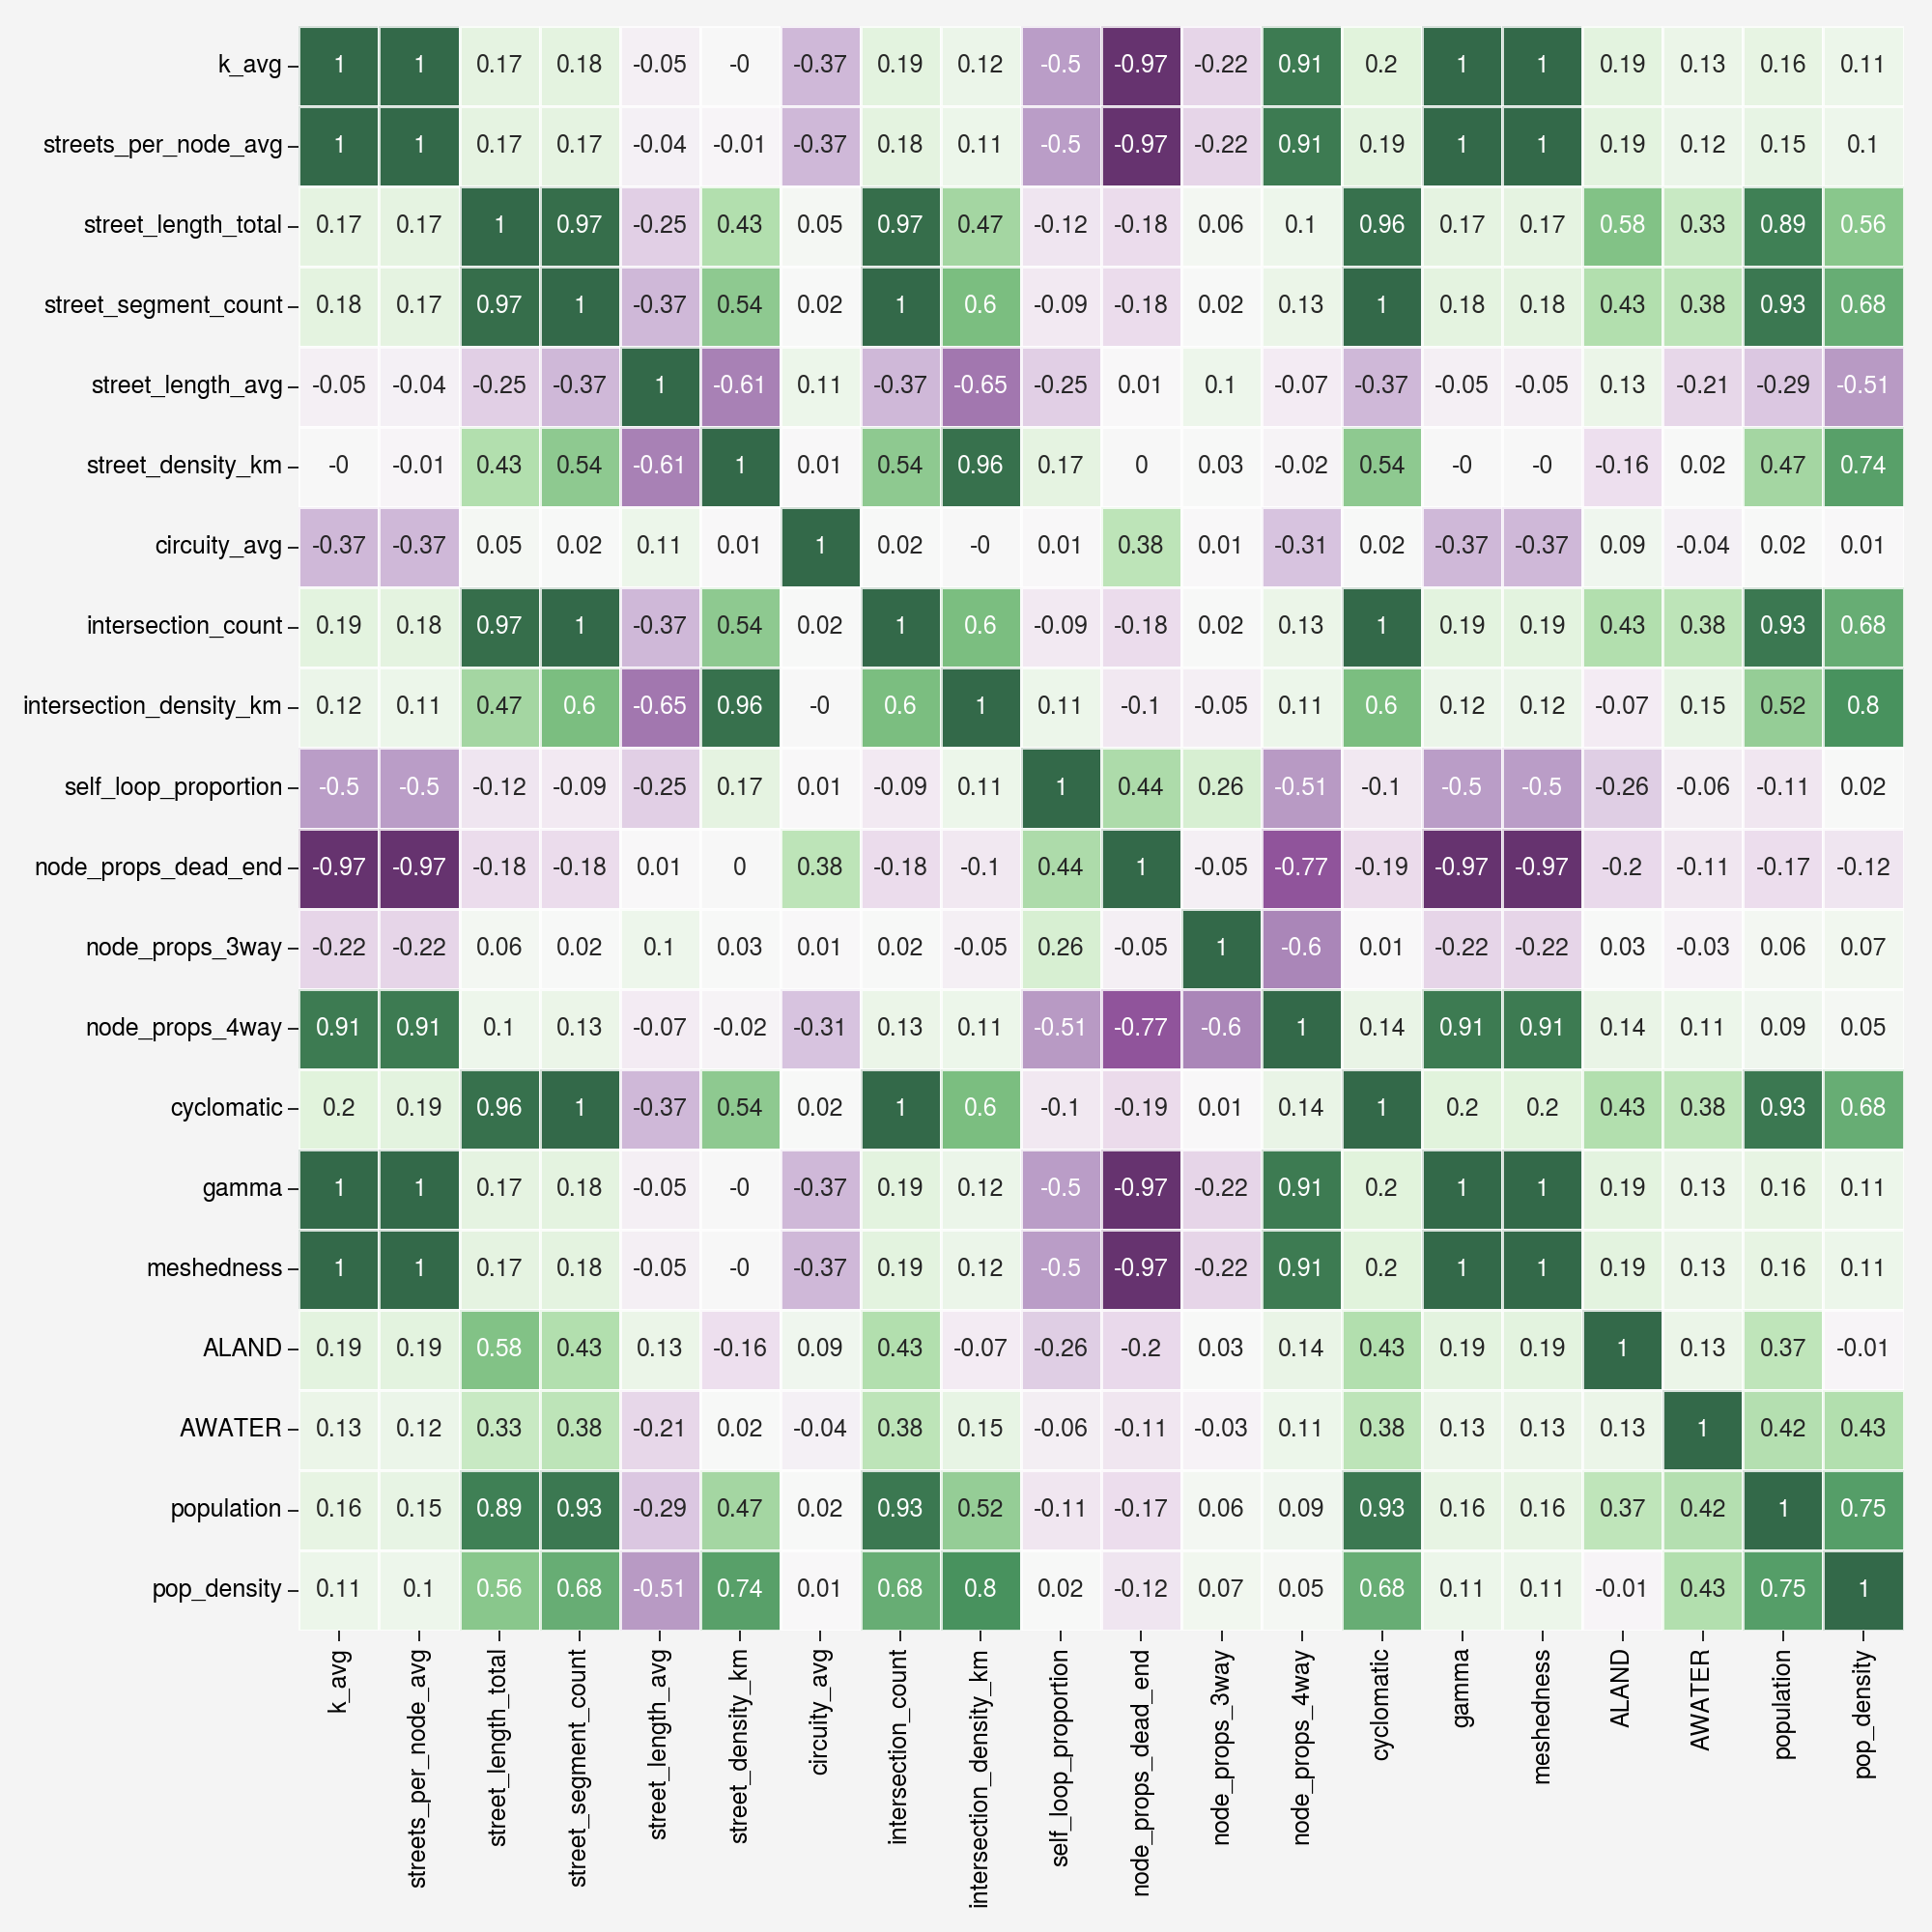

In [17]:
#fig, ax = pplt.subplots(figsize=(10,10))
#pplt.rc['linewidths'] =.5

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[features].corr().round(2),cmap='PrGn', annot=True, linewidth=.5,  square=True, cbar=False, alpha=0.8)
plt.minorticks_off()
plt.tight_layout()
plt.savefig("../paper/figures/corr_heatmap.png")

/var/folders/79/cknfb1sx2pv16rztkpg6wzlw0000gn/T/ipykernel_78881/496633435.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


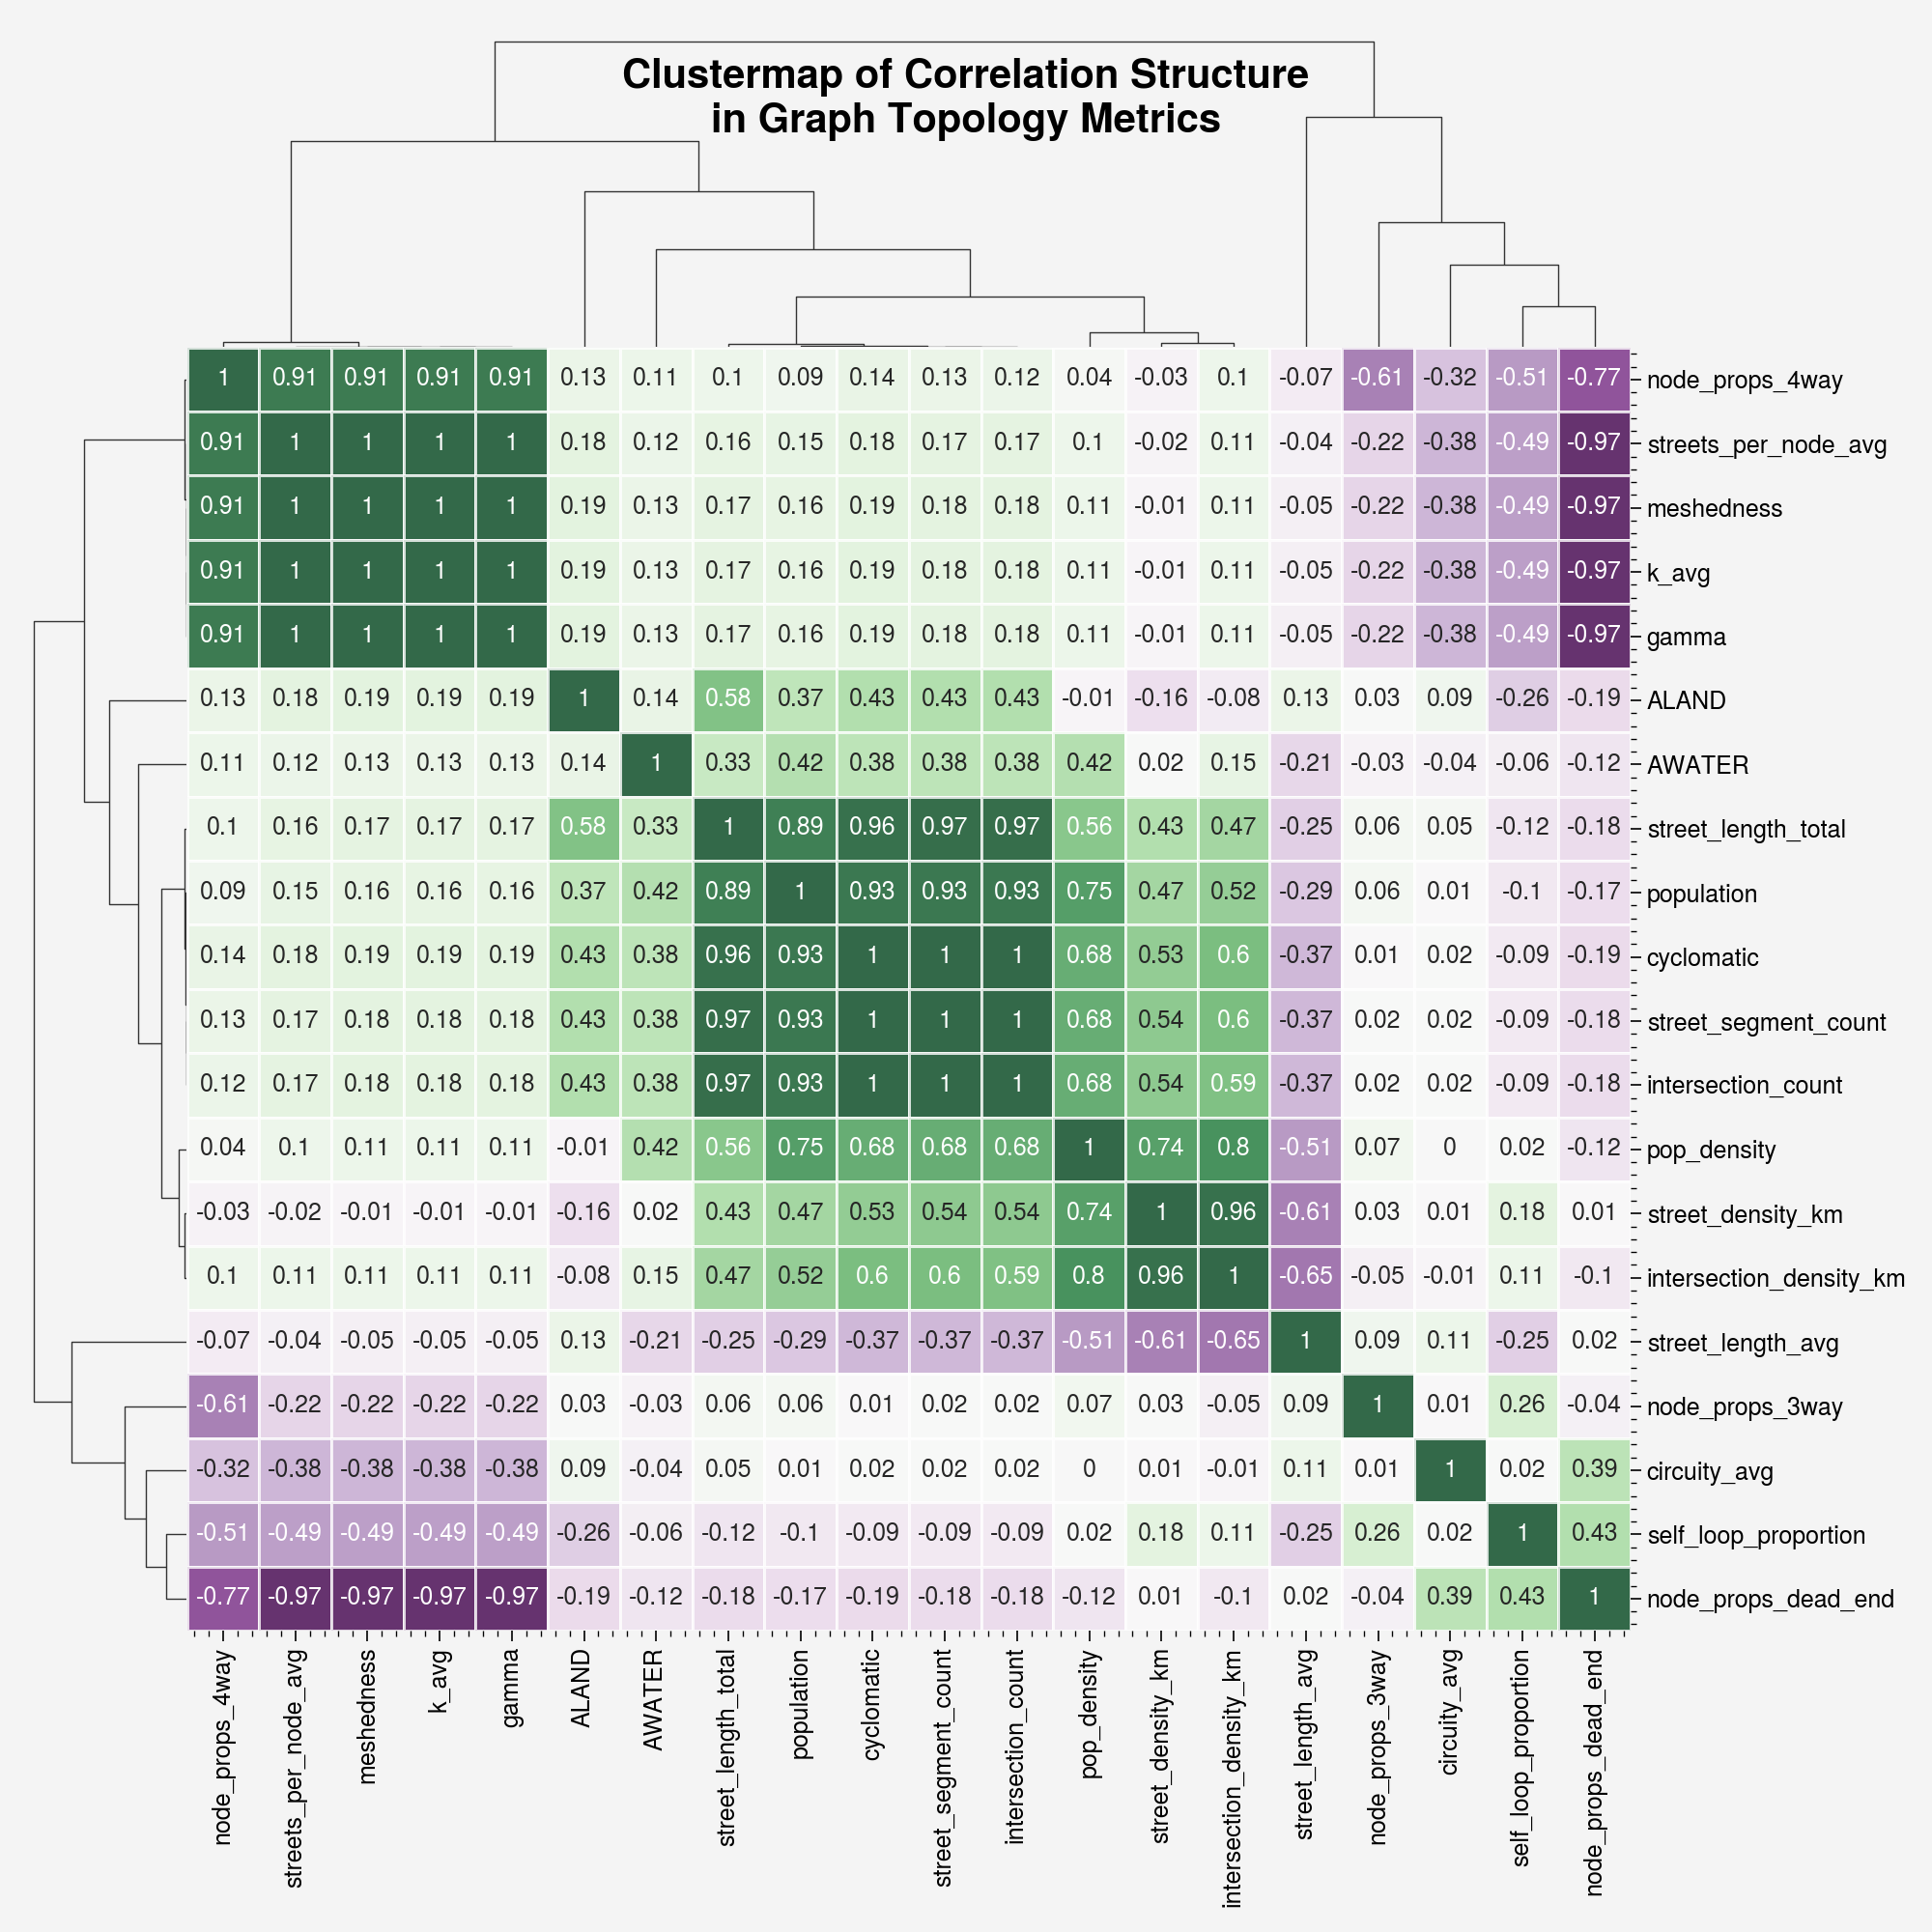

In [46]:
sns.clustermap(
    df[features].corr().round(2),
    cmap="PrGn",
    alpha=0.8,
    cbar_pos=(1, 0.2, 0.03, 0.4),
    dendrogram_ratio=(0.1, 0.2),
    annot=True,
    metric='correlation',
    linewidth=0.5
)
plt.suptitle('Clustermap of Correlation Structure\nin Graph Topology Metrics', fontsize=15, y=.97)
plt.tight_layout()
plt.savefig("../paper/figures/clustermap.png")

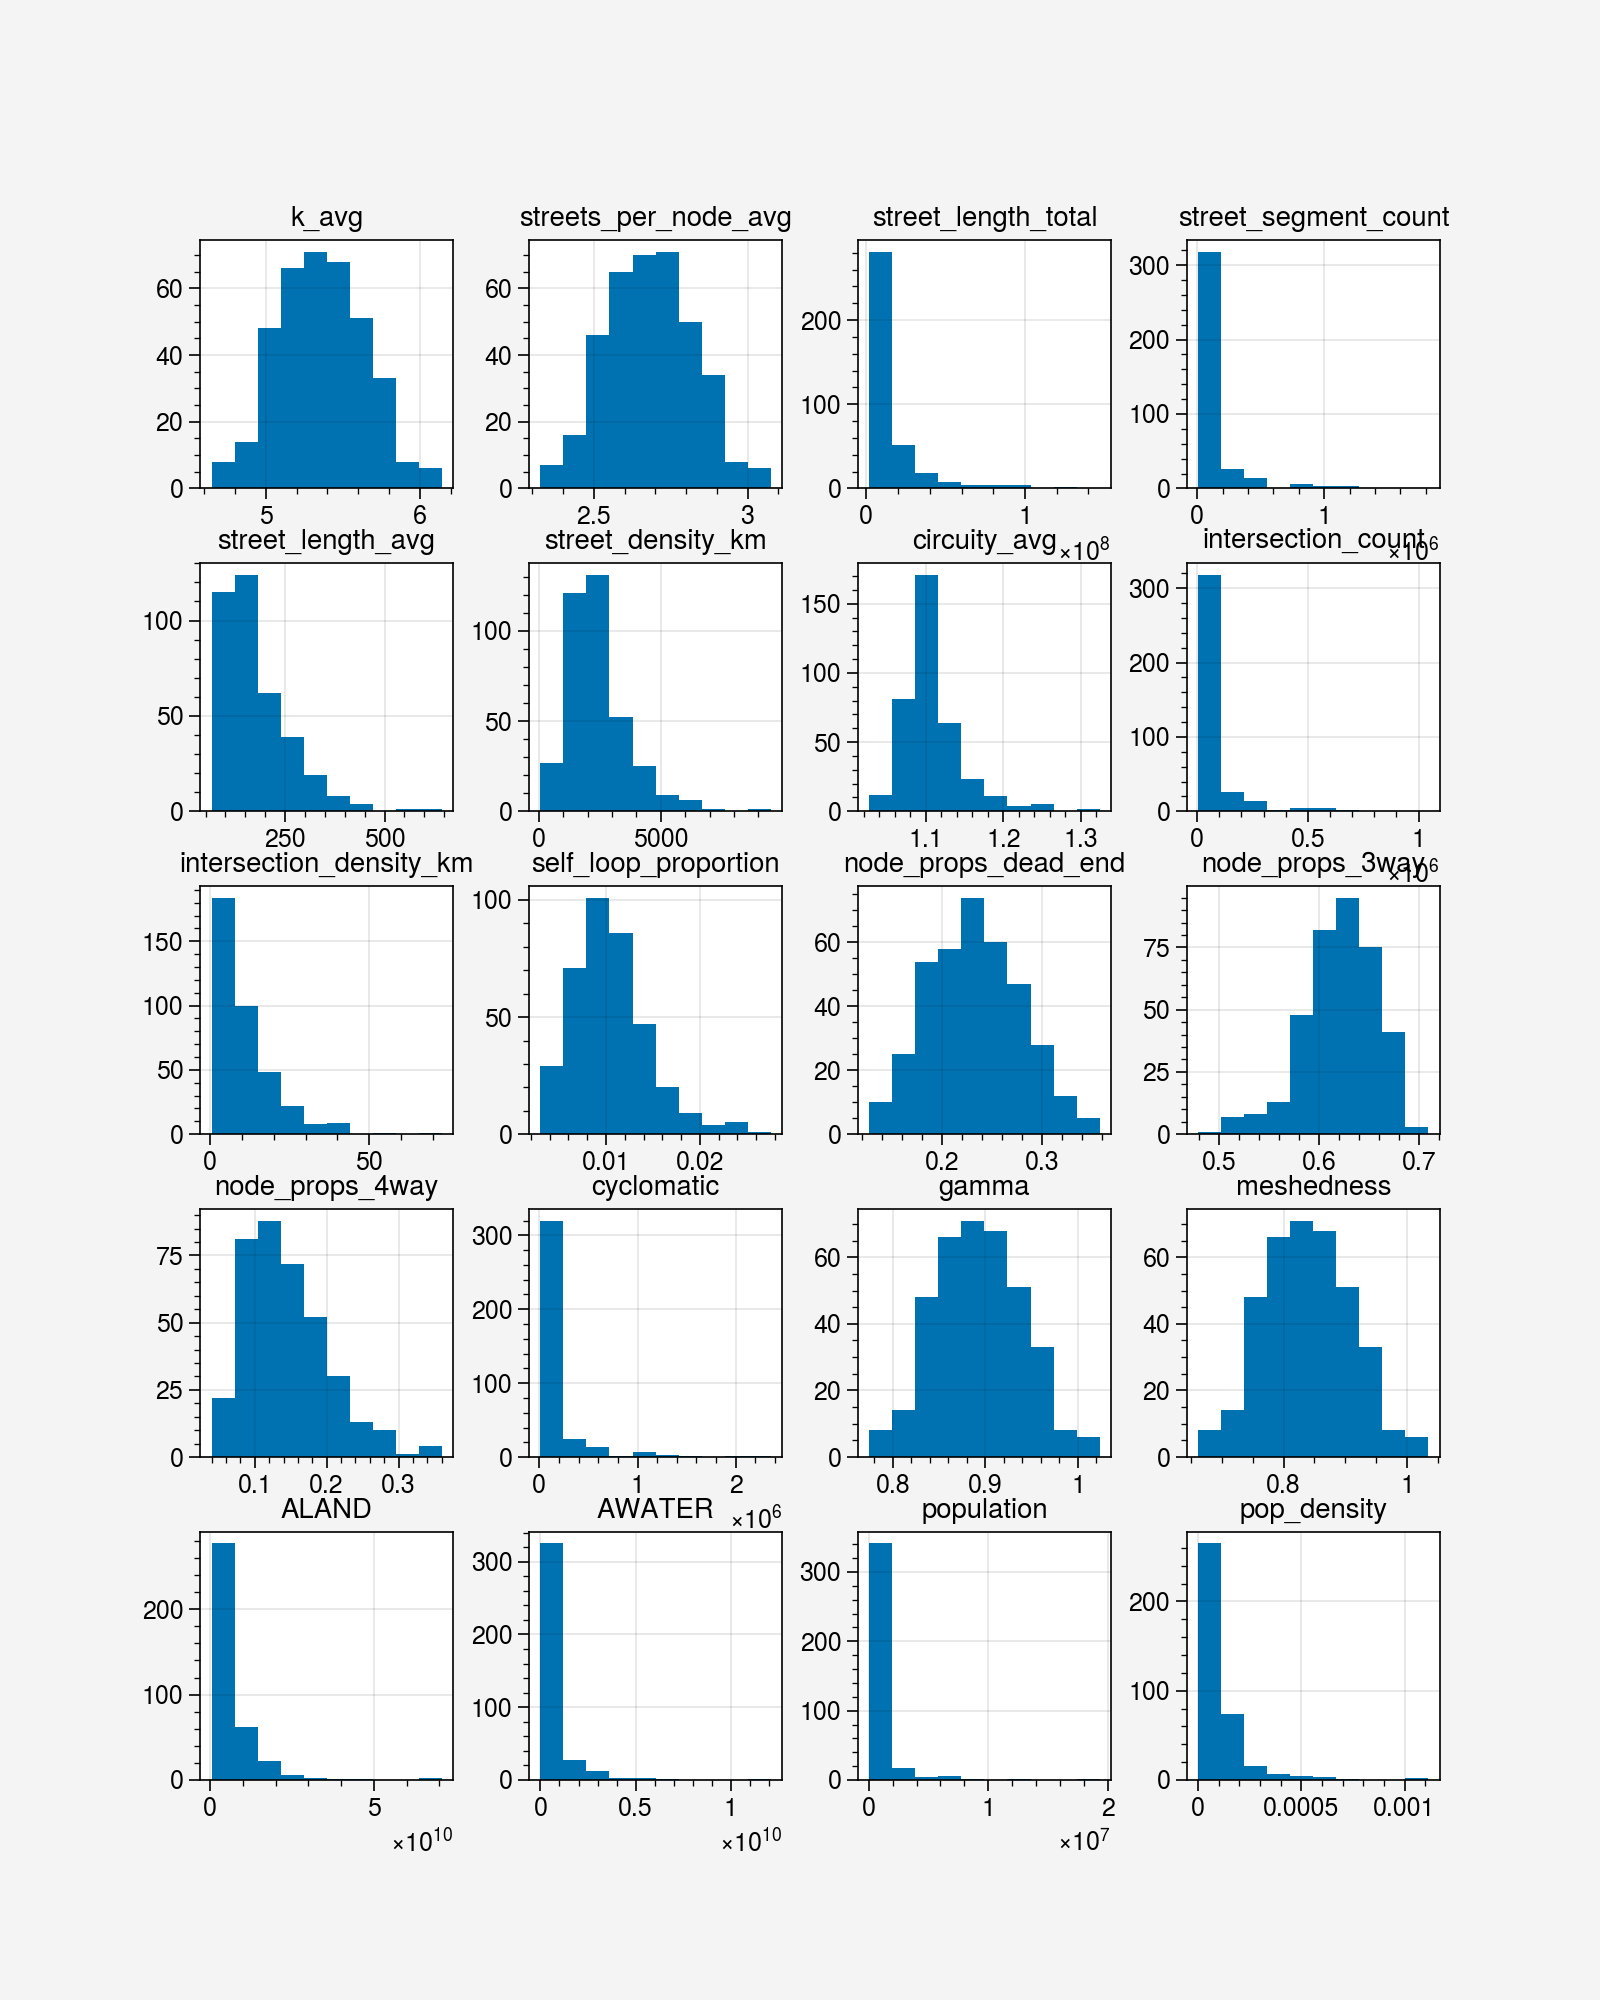

In [319]:
df[features].hist(figsize=(8,10))
plt.savefig('../paper/figures/variable_distributions.png')

<AxesSubplot:>

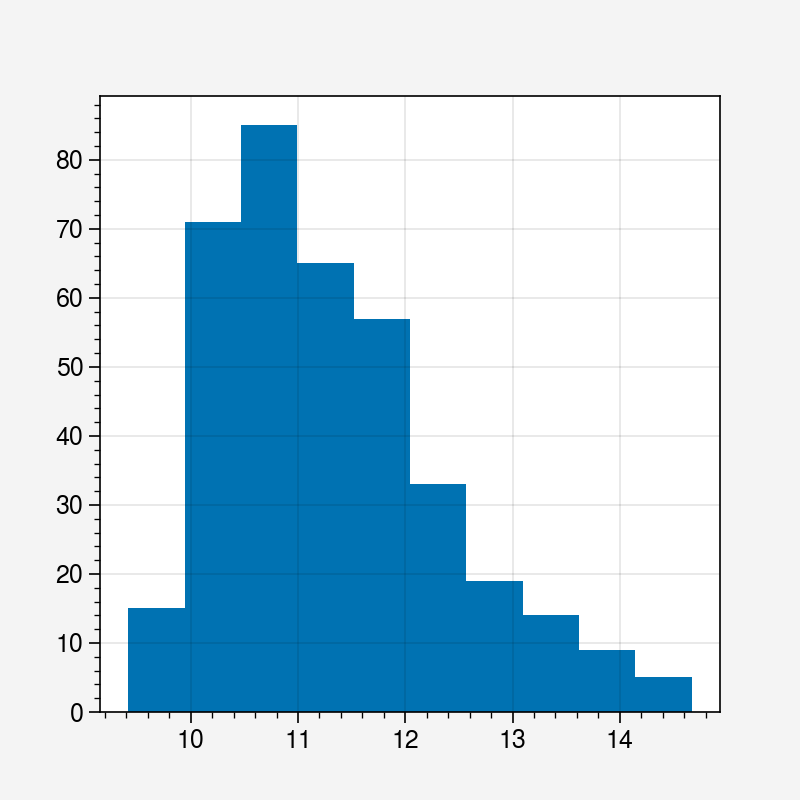

In [17]:
np.log(df.cyclomatic).hist()

In [19]:
# these variables are normal, so convert to Z. Others get logged in the formula

z_features = [
    "circuity_avg",
    "self_loop_proportion",
    "node_props_dead_end",
    "node_props_3way",
    "node_props_4way",
    "meshedness",

]

In [21]:
from scipy.stats import zscore

In [22]:
df[z_features] = df[z_features].apply(zscore)

In [23]:
df = df[df.seg_difference>0]

## $\Delta_{\tilde{H}}$

In [24]:
form_diff = (
    "seg_difference ~ 1 + planar_measure + np.log(street_length_total) + np.log(street_length_avg) + np.log(street_density_km) +"
    "np.log(intersection_density_km) + self_loop_proportion +  circuity_avg + node_props_dead_end + node_props_3way + node_props_4way + np.log(cyclomatic) + meshedness  +"
    "np.log(population) + np.log(pop_density) + np.log(ALAND) + np.log(AWATER)"
)

In [25]:
model_diff = smf.ols(form_diff, df[df.seg_difference>0]).fit()

In [26]:
model_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         seg_difference   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.873
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           0.000278
Time:                        16:36:39   Log-Likelihood:                 1146.9
No. Observations:                 369   AIC:                            -2262.
Df Residuals:                     353   BIC:                            -2199.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.5653      0.434     -1.301      0.194      -1.420       0.289
planar_measure                      0.0052      0.009      0.574      0.566      -0.013       0.023
np.log(street_length_total)        -0.3698      0.267     -1.387      0.166      -0.894       0.155
np.log(street_length_avg)          -0.7005      0.642     -1.091      0.276      -1.963       0.562
np.log(street_density_km)           1.0592      0.712      1.489      0.138      -0.340       2.459
np.log(intersection_density_km)    -1.0636      0.711     -1.495      0.136      -2.462       0.335
self_loop_proportion               -0.0001      0.001     -0.147      0.883      -0.002       0.002
circuity_avg                       -0.0006      0.001     -0.858      0.392      -0.002       0.001
node_props_dead_end                -0.1139      0.091     -1.250      0.212      -0.293       0.065
node_props_3way                     0.0005      0.040      0.013      0.990      -0.079       0.080
node_props_4way                     0.0391      0.048      0.815      0.416      -0.055       0.133
np.log(cyclomatic)                  0.3705      0.267      1.389      0.166      -0.154       0.895
meshedness                         -0.1515      0.067     -2.264      0.024      -0.283      -0.020
np.log(population)                  0.0009      0.002      0.399      0.690      -0.004       0.006
np.log(pop_density)                 0.0012      0.002      0.710      0.478      -0.002       0.005
np.log(ALAND)                      -0.0003      0.003     -0.086      0.932      -0.007       0.006
np.log(AWATER)                     -0.0009      0.001     -1.552      0.122      -0.002       0.000
==============================================================================
Omnibus:                        5.734   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.681
Skew:                           0.241   Prob(JB):                       0.0584
Kurtosis:                       3.371   Cond. No.                     5.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
from seg_networks import Linear_Reg_Diagnostic

In [28]:
diag_plots_diff = Linear_Reg_Diagnostic(model_diff)

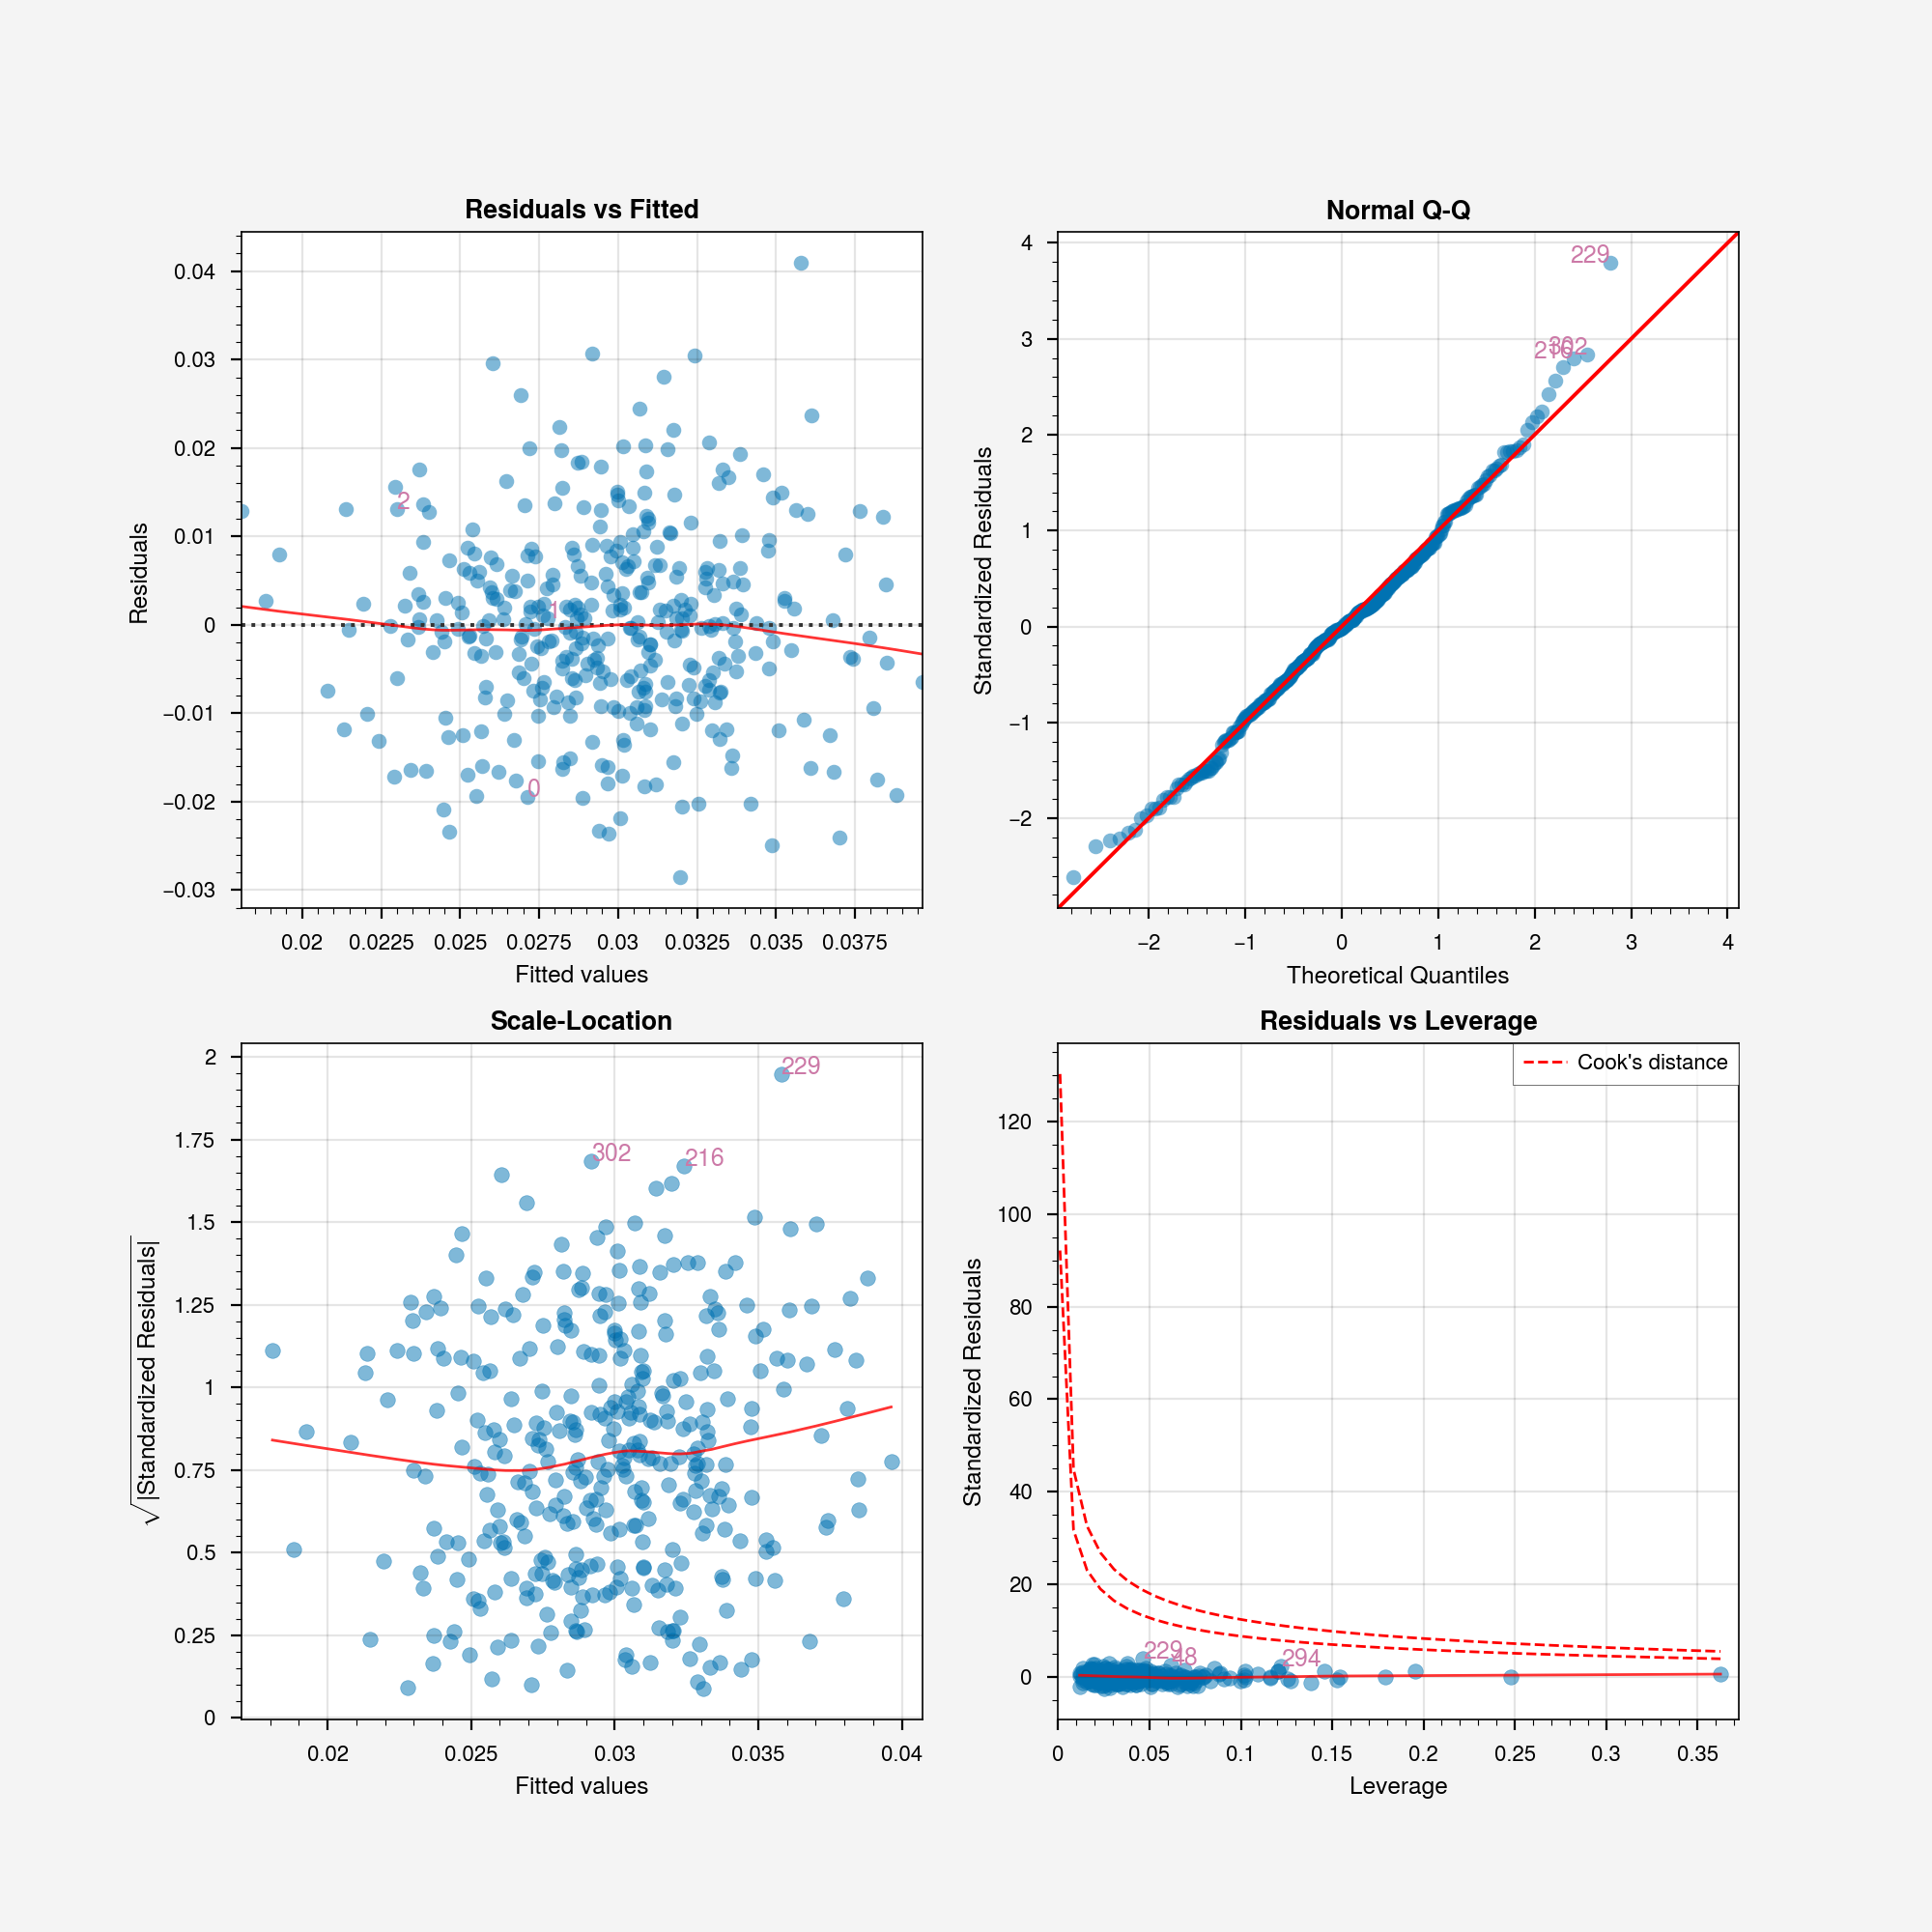

(<Figure size 1000x1000 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [29]:
diag_plots_diff()

## $\Delta_{pct}$

In [30]:
form_pct = (
    "pct_diff ~ 1 + planar_measure + np.log(street_length_total) + np.log(street_length_avg)  + np.log(street_density_km) +"
    "np.log(intersection_density_km) + self_loop_proportion +  circuity_avg + node_props_dead_end + node_props_3way + node_props_4way + np.log(cyclomatic) + meshedness  +"
    "np.log(population) + np.log(pop_density) + np.log(ALAND) + np.log(AWATER)"
)

In [31]:
model_pct = smf.ols(form_pct, df[df.seg_difference>0]).fit()

In [32]:
model_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pct_diff   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     28.87
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           2.28e-52
Time:                        16:37:59   Log-Likelihood:                -1259.4
No. Observations:                 369   AIC:                             2551.
Df Residuals:                     353   BIC:                             2613.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          99.5685    295.054      0.337      0.736    -480.716     679.853
planar_measure                    -91.0549      6.150    -14.805      0.000    -103.151     -78.959
np.log(street_length_total)         4.7630    181.099      0.026      0.979    -351.406     360.932
np.log(street_length_avg)          22.4558    435.914      0.052      0.959    -834.860     879.772
np.log(street_density_km)         -33.8059    483.342     -0.070      0.944    -984.398     916.786
np.log(intersection_density_km)    31.1803    483.127      0.065      0.949    -918.988     981.349
self_loop_proportion               -0.3143      0.594     -0.529      0.597      -1.483       0.854
circuity_avg                        0.7963      0.482      1.652      0.099      -0.152       1.744
node_props_dead_end              -100.7292     61.903     -1.627      0.105    -222.474      21.016
node_props_3way                   -35.7847     27.504     -1.301      0.194     -89.877      18.307
node_props_4way                   -15.9608     32.574     -0.490      0.624     -80.024      48.103
np.log(cyclomatic)                 -3.7546    181.246     -0.021      0.983    -360.212     352.703
meshedness                        -89.8840     45.453     -1.978      0.049    -179.276      -0.492
np.log(population)                 -0.2358      1.597     -0.148      0.883      -3.377       2.906
np.log(pop_density)                 0.0931      1.177      0.079      0.937      -2.222       2.408
np.log(ALAND)                      -0.3289      2.311     -0.142      0.887      -4.875       4.217
np.log(AWATER)                     -0.2651      0.393     -0.675      0.500      -1.037       0.507
==============================================================================
Omnibus:                       21.049   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.104
Skew:                           0.421   Prob(JB):                     1.76e-07
Kurtosis:                       4.147   Cond. No.                     5.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
diag_plots_pct = Linear_Reg_Diagnostic(model_pct)

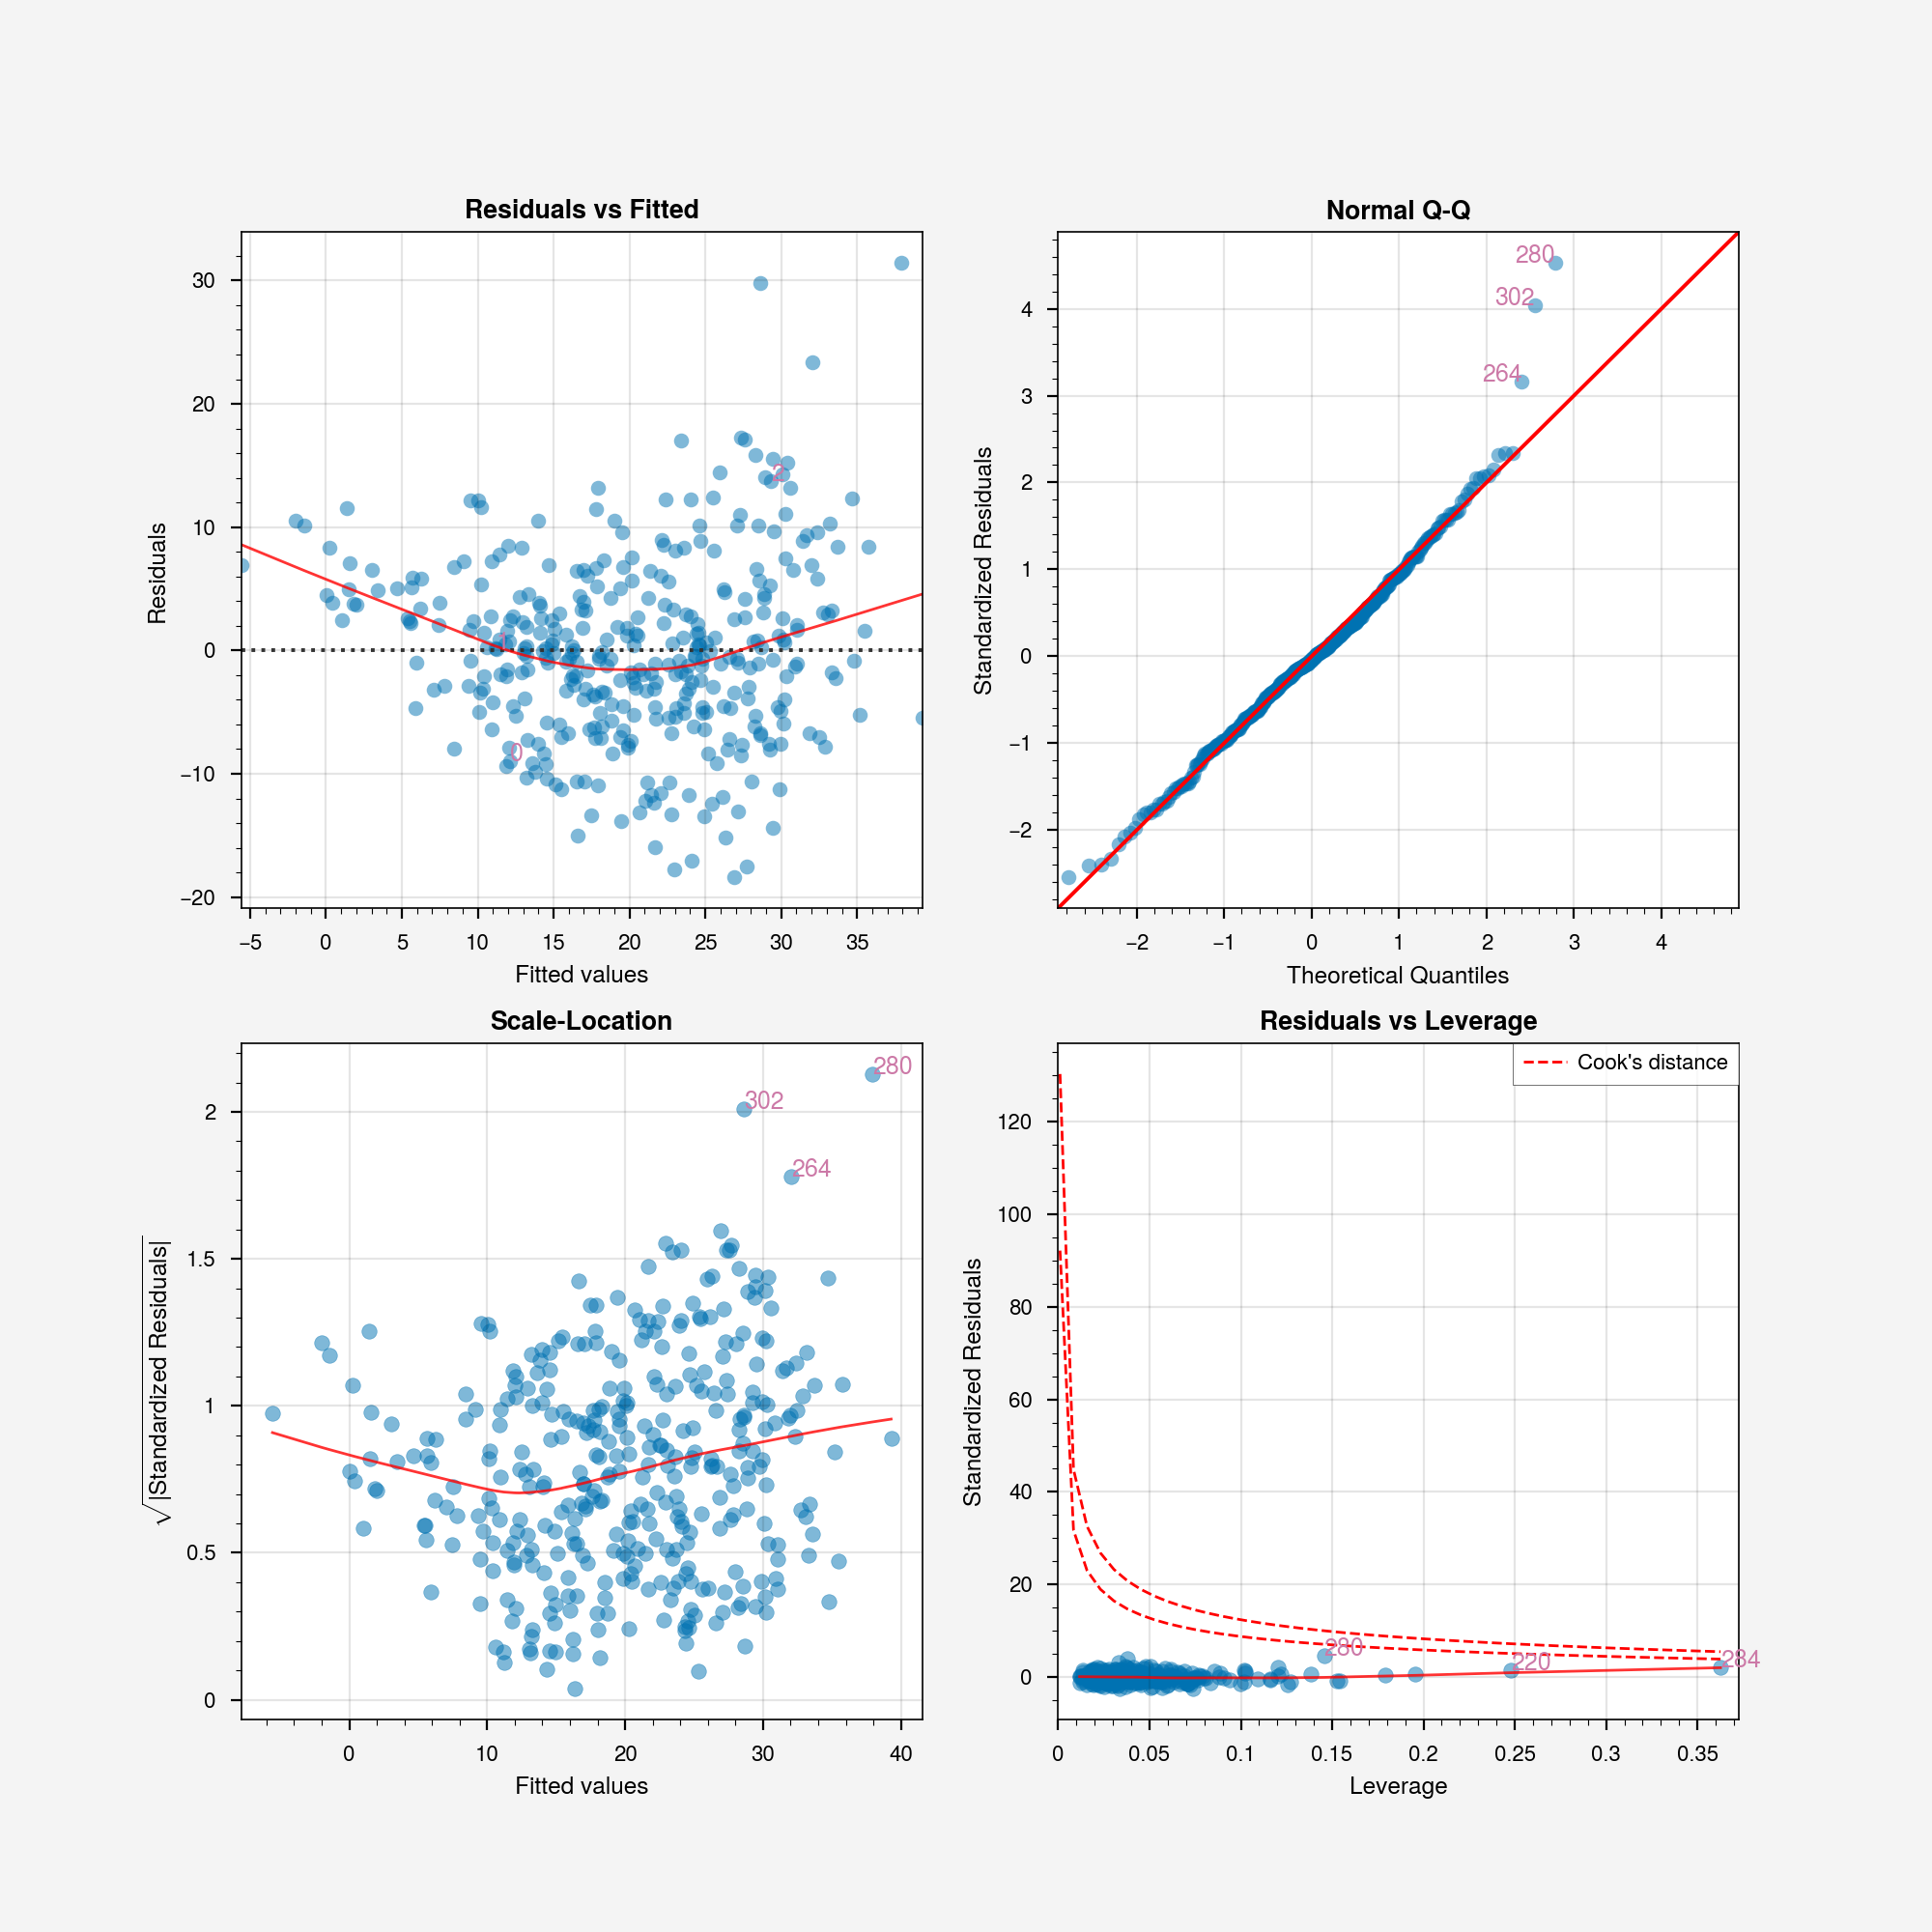

(<Figure size 1000x1000 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [34]:
diag_plots_pct()

## Results to table

In [35]:
# pull out variable names and escape for latex
names = model_diff.params.index.str.replace('_', '\_').tolist()

In [36]:
names = [name.replace('np.', '') for name in names]

In [37]:
print(names[1])

planar\_measure


In [38]:
renamer = dict(zip(model_diff.params.index.tolist(), names))

In [39]:
print(renamer)

{'Intercept': 'Intercept', 'planar_measure': 'planar\\_measure', 'np.log(street_length_total)': 'log(street\\_length\\_total)', 'np.log(street_length_avg)': 'log(street\\_length\\_avg)', 'np.log(street_density_km)': 'log(street\\_density\\_km)', 'np.log(intersection_density_km)': 'log(intersection\\_density\\_km)', 'self_loop_proportion': 'self\\_loop\\_proportion', 'circuity_avg': 'circuity\\_avg', 'node_props_dead_end': 'node\\_props\\_dead\\_end', 'node_props_3way': 'node\\_props\\_3way', 'node_props_4way': 'node\\_props\\_4way', 'np.log(cyclomatic)': 'log(cyclomatic)', 'meshedness': 'meshedness', 'np.log(population)': 'log(population)', 'np.log(pop_density)': 'log(pop\\_density)', 'np.log(ALAND)': 'log(ALAND)', 'np.log(AWATER)': 'log(AWATER)'}


In [40]:
from stargazer.stargazer import Stargazer

In [41]:
results_table = Stargazer([model_diff, model_pct])
results_table.title('Segregation Difference')
results_table.custom_columns([r'$\Delta_{\tilde{H}}$', r'$\Delta_{pct}$'], [1, 1])
results_table.show_confidence_intervals(True)
results_table.rename_covariates(renamer)

In [42]:
# redirect print to write the stargazer table to file

import sys
original_stdout = sys.stdout # Save a reference to the original standard output

with open("../paper/tables/regression.md", 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(results_table.render_latex())
    sys.stdout = original_stdout # Reset the standard output to its original value
